<a href="https://colab.research.google.com/github/RafaelMatera/WIA/blob/main/WIA_BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre

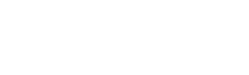

Este é o Wia (Who I Am) BOT, ele vai ser o seu guia para sua jornada de autoconhecimento.

Visto que o momento em que vivemos as hard skills (habilidades técnicas) estão cada vez mais fáceis de serem executadas por IA’s e as Soft Skills (habilidades pássivas) estão tendo cada vez mais peso no mercado, o processo de saber sobre sí mesmo é essencial, mas é extramamente dificil nós avaliarmos de forma precisa requer muita reflexão profunda e diálogo com pessoas confiáveis para chegar a conclusões sobre nossas personalidades e que demoram para serem formuladas e tendem a serem imprecisas. Com isso criei o WIA BOT para facilitar o autoconhecimento, servindo como um espelho, mostrando quem você realmente é, de forma rápida e simples, acompanhando o ritmo acelarado dos tempos modernos.

Ele serve para te ajudar em sua jornada pessoal e interpessoal no trabalho ou entre amigos, ele foi criado com intuito de fazer as pessoas a conhecerem mais sobre sí mesmas e usufruírem disso para melhorar sua vida em casa ou no trabalho.

In [ ]:
%pip -q install google-genai

In [ ]:
# Configurar a API Key do Google Gemini

import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [ ]:
!pip install -q google-adk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.1/232.1 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.1/334.1 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# -*- coding: utf-8 -*-
# Configuração para permitir caracteres especiais em português

# Importa a função para extrair texto de PDF (se ainda estiver usando em outra parte)
# try:
#     from pdfminer.high_level import extract_text
# except ImportError:
#     print("AVISO: Biblioteca 'pdfminer.six' não instalada. Necessária se carregar descrições de PDF.")
#     extract_text = None # Define como None se não instalada

# Importa a biblioteca para usar a API do Google Gemini
try:
    import google.generativeai as genai
except ImportError:
    print("ERRO: Biblioteca 'google-generativeai' não instalada. Execute '!pip install google-generativeai' antes.")
    genai = None # Define como None se não instalada


# ==============================================================================
# --- Configuração e Parâmetros Gerais ---
# ==============================================================================

# SUA CHAVE DE API GOOGLE GEMINI
# Obtenha sua chave em https://makersuite.google.com/app/apikey
# É ALTAMENTE RECOMENDADO usar os Segredos do Colab (painel esquerdo, ícone da chave)
# em vez de colar a chave diretamente no código por segurança.
# Exemplo usando Segredos: API_KEY = google.colab.userdata.get('NOME_DO_SEGREDO')
# Substitua 'SUA_CHAVE_DE_API_REAL' pela sua chave se não usar Segredos (menos seguro)
API_KEY = "GOOGLE_API_KEY" # <<< SUBSTITUA ESTA LINHA

# NOME DO ARQUIVO TXT COM AS DESCRIÇÕES DAS QUALIDADES
# Este arquivo (dados_conhecimento (1).txt) contém as descrições longas de cada qualidade.
# Certifique-se de que este arquivo está no ambiente do seu Google Colab.
ARQUIVO_DESCRICOES_QUALIDADES = 'dados_conhecimento (1).txt' # <--- Nome do arquivo fornecido

# REGRAS E NOTAS GERAIS:
"""
Fluxo da interação:
1. Início: Simulação do Agente 'Who' (coleta de dados básicos).
2. Em seguida: Agente 'I' (administra o teste e analisa os resultados).
3. Por fim: Agente 'Am' (inicia conversa livre usando dados anteriores e API Gemini).
"""

# --- Configuração do Modelo Gemini ---
# Esta configuração é feita uma vez no início do script
model = None
chat_session = None
gemini_ready = False

if genai is not None and API_KEY != "SUA_CHAVE_DE_API_REAL" and API_KEY is not None:
    try:
        genai.configure(api_key=API_KEY)
        # Escolha o modelo Gemini. 'gemini-1.5-flash' é um bom ponto de partida (rápido e custo-efetivo).
        # 'gemini-1.0-pro' ou 'gemini-1.5-pro' podem ser usados para tarefas mais complexas.
        model = genai.GenerativeModel('gemini-1.5-flash') # Ou outro modelo desejado
        # Inicia uma sessão de chat para manter o histórico da conversa
        # O histórico é importante para o modelo entender o contexto do diálogo.
        chat_session = model.start_chat(history=[])
        gemini_ready = True
        print("✅ Modelo Google Gemini configurado e pronto para conversar!")
    except Exception as e:
        print(f"❌ ERRO ao configurar o modelo Google Gemini: {e}")
        print("Por favor, verifique sua chave de API e se ela tem permissão para usar o modelo especificado.")
else:
    print("⚠️ Chave de API Gemini não configurada ou biblioteca não instalada. A conversa do Agente 'Am' será simulada.")


# ==============================================================================
# --- Agente "Who" (Simulação de Coleta de Dados Iniciais) ---
# ==============================================================================

# NOTAS SOBRE O COMPORTAMENTO DO AGENTE "WHO" (CONCEITUAL)
"""
Objetivo: Introduzir o usuário e coletar Nome, Idade e Onde mora.
Introdução: "Eu sou o Wia, seu amigo em sua jornada de autoconhecimento."
Perguntas: Sequenciais para Nome, Idade, Onde mora.
Armazenamento: Salva dados para uso posterior pelos próximos agentes.
"""

# --- Esta parte será executada diretamente no início do script principal ---
# print("--- Iniciando Simulação do Agente 'Who' (Coleta de Dados Iniciais) ---")
# ... código de coleta de dados ...
# print("\n--- Simulação do Agente 'Who' Finalizada. ---")
# A variável `dados_usuario` será populada aqui antes da execução do Agente I


# ==============================================================================
# --- Agente "I" (Administração do Teste e Análise) ---
# ==============================================================================

# NOTAS E PARAMETROS DO AGENTE "I" (Conforme definido anteriormente)
"""
Este é o espaço para documentar as regras e o funcionamento do teste "I".

REGRAS DEFINIDAS PELO USUÁRIO PARA O TESTE:
1.  Início: Começa após o cadastro do agente "Who".
2.  Base de Perguntas: Inseridas MANUALMENTE NESTE CÓDIGO (lista_perguntas_completa).
3.  Descrições das Qualidades: Carregadas do arquivo TXT especificado em ARQUIVO_DESCRICOES_QUALIDADES.
    -> O CÓDIGO ATUAL ESPERA QUE CADA QUALIDADE NO ARQUIVO TENHA O NOME SEGUIDO POR PARÁGRAFOS DE DESCRIÇÃO, ATÉ A LINHA "Ideias para Ação:". ADAPTE carregar_descricoes_qualidades SE O FORMATO FOR DIFERENTE. <---
4.  Regras de Pontuação/Análise: Inseridas MANUALMENTE NESTE CÓDIGO (regras_analise_score).
    -> VOCÊ PRECISA DEFINIR A ESTRUTURA regras_analise_score ABAIXO com o mapeamento de perguntas para qualidades e como pontuar as respostas (1-5). <---
5.  Formato de Resposta: Usuário responde com 1-Concordo Totalmente, 2-Concordo, etc. (números 1 a 5).
6.  Apresentação: Perguntas feitas individualmente, uma após a outra.
7.  Variações do Teste: Completa (60 perguntas, 9 qualidades), Normal (40 perguntas, 6 qualidades), Curta (20 perguntas, 3 pontos fortes).
    (Nota: A lógica de cálculo usando regras manuais precisa ser implementada em analisar_respostas_e_identificar_qualidades).

PARAMETROS DO TESTE:
Comprimento das versões do teste e quantas qualidades/pontos fortes cada uma visa identificar:
- Completa: 60 perguntas -> 9 qualidades
- Normal:  40 perguntas -> 6 qualidades
- Curta:   20 perguntas -> 3 pontos fortes

Respostas permitidas e seus significados:
1: Concordo Totalmente
2: Concordo
3: Não concordo nem discordo
4: Discordo
5: Discordo Totalmente
"""

# Mapeamento das opções de resposta para facilitar a exibição
OPCOES_RESPOSTA = {
    '1': '1 - Concordo Totalmente',
    '2': '2 - Concordo',
    '3': '3 - Não concordo nem discordo',
    '4': '4 - Discordo',
    '5': '5 - Discordo Totalmente'
}

# Comprimento esperado para cada versão do teste
COMPRIMENTO_VERSOES = {
    'completa': 60,
    'normal': 40,
    'curta': 20
}

# --- SEÇÃO PARA INSERIR AS PERGUNTAS MANUALMENTE NO CÓDIGO ---
# Cole suas 60 perguntas aqui, uma string por linha na lista.
# Certifique-se de ter pelo menos 60 perguntas para a versão completa.
# O índice de cada pergunta nesta lista (começando do 0) será usado nas regras de pontuação abaixo.
lista_perguntas_completa = [
    "Pergunta 1: Você sente uma grande satisfação ao completar tarefas e riscar itens de uma lista de afazeres.",
    "Pergunta 2: Você se sente à vontade para tomar decisões e agir rapidamente, mesmo sem ter todas as informações disponíveis.",
    "Pergunta 3: Você tende a analisar fatos e dados para entender uma situação antes de chegar a uma conclusão.",
    "Pergunta 4: Você se sente energizado(a) ao conhecer novas pessoas e consegue construir um bom relacionamento inicial rapidamente, mesmo que superficial.",
    "Pergunta 5: Você prefere um ambiente de trabalho ou vida com estrutura clara, regras e procedimentos definidos.",
    "Pergunta 6: Você se sente energizado(a) por resolver problemas complexos e encontrar soluções para o que não está funcionando bem.",
    "Pergunta 7: Você se sente à vontade para expressar sua opinião de forma direta, mesmo que isso possa gerar desacordo, se acreditar que é necessário para alinhar as pessoas ou a situação.",
    "Pergunta 8: Você passa uma quantidade significativa de tempo pensando e planejando o futuro, visualizando o que pode ser.",
    "Pergunta 9: Você tem a capacidade de identificar o potencial nas outras pessoas e sente satisfação em ajudá-las a crescer e se desenvolver.",
    "Pergunta 10: Você acredita que todas as pessoas deveriam ser tratadas da mesma forma, com regras aplicadas igualmente a todos, independentemente de sua posição ou conexões.",
    "Pergunta 11: Você frequentemente tem novas ideias e gosta de fazer conexões entre conceitos aparentemente não relacionados.",
    "Pergunta 12: Você é a pessoa que geralmente toma a iniciativa para iniciar projetos ou transformar ideias em ações concretas.",
    "Pergunta 13: Você tem um conjunto de valores centrais e inabaláveis que guiam a maioria das suas decisões e ações.",
    "Pergunta 14: Você prospera em ambientes dinâmicos e em constante mudança, adaptando-se facilmente a novas circunstâncias.",
    "Pergunta 15: É importante para você que seu trabalho seja notado e reconhecido pelos outros, e você deseja se destacar.",
    "Pergunta 16: Você valoriza profundamente ter alguns poucos amigos próximos e leais, com quem você pode compartilhar abertamente seus pensamentos e sentimentos.",
    "Pergunta 17: Você nota e aprecia as qualidades únicas em cada pessoa, e acredita que as diferenças individuais devem ser levadas em conta ao interagir ou trabalhar com elas.",
    "Pergunta 18: Você gosta de ter tempo para pensar e refletir sozinho(a), processando ideias e experiências internamente.",
    "Pergunta 19: Você tende a ser uma pessoa otimista e entusiasmada, capaz de animar os outros e encontrar o lado positivo mesmo em situações desafiadoras.",
    "Pergunta 20: Você costuma perceber e sentir as emoções das pessoas ao seu redor, conseguindo se colocar no lugar delas e entender como elas estão se sentindo.",
    "Pergunta 21: Quando você assume um compromisso, sente uma forte obrigação pessoal de cumpri-lo, mesmo que encontre dificuldades no caminho.",
    "Pergunta 22: Você gosta de coletar informações, objetos ou experiências que lhe interessam, mesmo que não tenha um propósito imediato para eles, apenas por curiosidade ou por considerá-los úteis no futuro.",
    "Pergunta 23: Você se sente motivado(a) por comparar seu desempenho com o de outras pessoas e busca se superar para estar entre os melhores.",
    "Pergunta 24: Em situações sociais ou ao conhecer pessoas novas, você se sente à vontade para iniciar conversas e tem facilidade em cativar e persuadir as pessoas.",
    "Pergunta 25: Você se concentra mais em aprimorar o que já é bom em você e nos outros, buscando transformar algo forte em algo excelente, em vez de dedicar a maior parte do seu tempo a corrigir fraquezas.",
    "Pergunta 26: Você faz questão de garantir que as pessoas se sintam parte de um grupo ou equipe, e se esforça para incluir aqueles que poderiam se sentir à margem.",
    "Pergunta 27: Você gosta de organizar e coordenar múltiplos elementos e pessoas para que tudo se encaixe da melhor forma possível e funcione de maneira eficiente.",
    "Pergunta 28: Você sente prazer no processo de aprender algo novo, seja uma habilidade prática ou um novo assunto, e se dedica a adquirir competência nessa área.",
    "Pergunta 30: Você tende a buscar pontos em comum e evitar conflitos em situações de desacordo, valorizando um ambiente de harmonia.",
    "Pergunta 31: Ao tentar entender uma situação atual, você frequentemente olha para o passado e para a história por trás dela, buscando o contexto para ter uma compreensão mais clara.",
    "Pergunta 32: Antes de agir em uma situação, você costuma pensar cuidadosamente nos possíveis riscos e obstáculos, tomando precauções para evitá-los.",
    "Pergunta 33: Uma vez que você define um objetivo, você consegue manter o foco nele e resistir a distrações ou desvios que possam surgir.",
    "Pergunta 34: Em situações de grupo ou equipe, você geralmente se sente à vontade para tomar a iniciativa, sugerir o que deve ser feito e guiar os outros.",
    "Pergunta 35: Você se sente compelido(a) a defender aqueles que considera injustiçados ou em desvantagem, buscando igualdade de oportunidades para todos.",
    "Pergunta 36: Você tem uma forte confiança em suas próprias habilidades e em seu julgamento, sentindo-se capaz de tomar decisões e enfrentar desafios por conta própria.",
    "Pergunta 37: Você frequentemente vê como as coisas estão interligadas no mundo e acredita que muitos eventos acontecem por uma razão maior ou fazem parte de um propósito.",
    "Pergunta 38: Uma vez que uma decisão é tomada, você sente uma forte necessidade de agir rapidamente para colocar as coisas em movimento.",
    "Pergunta 39: Você sente uma satisfação profunda ao completar tarefas e alcançar metas, e busca constantemente novas realizações para sentir que está progredindo.",
    "Pergunta 40: Você costuma estar consciente da opinião dos outros sobre você e se importa com a forma como é percebido(a) pelas pessoas importantes em sua vida ou carreira.",
    "Pergunta 41: Você tende a antecipar possíveis problemas ou resultados negativos em uma situação e a pensar em como evitá-los ou mitigá-los.",
    "Pergunta 42: Você tem o hábito de reconhecer e apontar os pontos fortes das pessoas ao seu redor para incentivá-las e ajudá-las a usar seus talentos da melhor forma.",
    "Pergunta 43: Você possui uma forte motivação interna para trabalhar arduamente e se dedicar aos seus objetivos, sem precisar de muito estímulo externo.",
    "Pergunta 44: Você não evita conversas ou situações difíceis e se sente confortável em confrontar questões ou pessoas diretamente quando necessário.",
    "Pergunta 45: Você sente uma satisfação especial em consertar coisas que estão quebradas ou em mau funcionamento, sejam objetos, processos ou situações.",
    "Pergunta 46: Você tem uma visão clara e inspiradora do futuro que o(a) motiva e que você gosta de compartilhar para energizar e guiar os outros.",
    "Pergunta 47: Você tem um forte interesse em acumular conhecimento e fatos sobre diversos assuntos que despertam sua curiosidade.",
    "Pergunta 48: Você gosta de encontrar uma maneira lógica e organizada de estruturar informações ou ideias para que elas façam sentido e sejam claras.",
    "Pergunta 49: Você possui uma facilidade natural em cativar as pessoas e persuadi-las a ver as coisas do seu ponto de vista ou a concordar com suas ideias.",
    "Pergunta 50: Você se sente mais produtivo(a) e no controle quando sua vida e seu trabalho seguem uma rotina e um sistema organizado.",
    "Pergunta 51: Você encontra satisfação em observar e contribuir para o crescimento e o progresso, tanto seu quanto das pessoas ao seu redor.",
    "Pergunta 52: Você consegue pensar de forma abstrata e conceitual, identificando padrões e visualizando como diferentes possibilidades podem se desdobrar no futuro.",
    "Pergunta 53: Você tem uma facilidade natural para entender como as pessoas são diferentes e para adaptar sua abordagem para interagir de forma mais eficaz com cada uma delas.",
    "Pergunta 54: Você se sente desconfortável com situações em aberto ou indefinidas e sente uma necessidade de chegar a conclusões ou tomar decisões para que as coisas se resolvam.",
    "Pergunta 55: Você geralmente se sente mais motivado(a) e tem um desempenho melhor quando está sob pressão ou em situações com grandes desafios e expectativas.",
    "Pergunta 56: Você faz um esforço consciente para que pessoas novas em um grupo se sintam bem-vindas e à vontade.",
    "Pergunta 57: Você tem facilidade em explicar ideias complexas de uma forma simples e interessante para diferentes tipos de pessoas.",
    "Pergunta 58: É importante para você que os processos e procedimentos sejam justos e aplicados de maneira equitativa a todos os envolvidos.",
    "Pergunta 59: Você aprecia a ordem e a organização em seu ambiente físico e se sente melhor quando as coisas estão arrumadas e em seus devidos lugares.",
    "Pergunta 60: Você tem uma habilidade natural para identificar oportunidades e visualizar o potencial de crescimento ou sucesso em diferentes situações.",
    "Pergunta 61: Você sente satisfação em ajudar outras pessoas a definir e alcançar seus próprios objetivos.",
    # === ADICIONE TODAS AS SUAS 60 PERGUNTAS ABAIXO ===
    *(f"Pergunta {i+1}: Esta é uma pergunta placeholder {i+1}." for i in range(5, 60)) # Remove esta linha e adicione suas perguntas reais
    # ===============================================
]

# --- SEÇÃO PARA INSERIR AS REGRAS DE PONTUAÇÃO MANUALMENTE NO CÓDIGO ---
# Defina a estrutura das suas regras de pontuação aqui.
# Esta estrutura dirá ao código quais perguntas influenciam quais qualidades
# e como as respostas (1-5) se traduzem em pontos para aquela qualidade.
# O nome da qualidade AQUI deve CORRESPONDER EXATAMENTE ao nome da qualidade no arquivo dados_conhecimento (1).txt.
# Sugestão: um dicionário onde a chave é o nome da qualidade,
# e o valor é uma LISTA de dicionários, cada um representando uma regra para uma pergunta específica
# relacionada a essa qualidade.

regras_analise_score = {
    'Resiliente (Estoico)': [ # Use o nome EXATO do arquivo
        {'indice_pergunta': 0, 'pontuacao': {1: 2, 2: 1, 3: 0, 4: -1, 5: -2}}, # Pergunta 1 (Índice 0): Exemplo de como 1-5 pontua. Adapte seus valores.
        # ... adicione regras para outras perguntas que influenciam 'Resiliente (Estoico)' ...
    ],
    'Realizador (Conquistador)': [ # Use o nome EXATO do arquivo
        {'indice_pergunta': 1, 'pontuacao': {1: 2, 2: 2, 3: 1, 4: 0, 5: 0}}, # Pergunta 2 (Índice 1): Exemplo
        # ... adicione regras para outras perguntas que influenciam 'Realizador (Conquistador)' ...
    ],
    # === ADICIONE AS SUAS QUALIDADES E REGRAS DE PONTUAÇÃO AQUI ===
    # Para CADA qualidade que você quer pontuar, crie uma entrada neste dicionário.
    # Use o NOME EXATO da qualidade como aparece na primeira linha do bloco de descrição
    # no arquivo dados_conhecimento (1).txt.
    # Para CADA pergunta que pontua para essa qualidade, adicione um dicionário na lista:
    # {'indice_pergunta': N, 'pontuacao': {1: valor1, 2: valor2, 3: valor3, 4: valor4, 5: valor5}}
    # O 'indice_pergunta' é a posição da pergunta na lista_perguntas_completa (começa do 0).
    # O dicionário 'pontuacao' define quantos pontos cada resposta (1-5) dá para essa pergunta/qualidade.
    # ===============================================================
}

# --- FUNÇÃO PARA CARREGAR AS DESCRIÇÕES DAS QUALIDADES (DO ARQUIVO TXT) ---
def carregar_descricoes_qualidades(arquivo_txt):
    """
    Carrega as descrições completas das qualidades de um arquivo de texto.
    Assume que o formato é: Nome da Qualidade (Possível Sinônimo) seguido por parágrafos,
    até a linha "Ideias para Ação:".
    ADAPTE ESTA FUNÇÃO SE O FORMATO DO SEU ARQUIVO FOR DIFERENTE.
    """
    descricoes = {}
    qualidade_atual = None
    descricao_actual = [] # Usando 'actual' para evitar conflito com 'descricao_atual' em outros blocos de pensamento

    print(f"\n🔄 Tentando carregar descrições de qualidades de '{arquivo_txt}'...")
    try:
        with open(arquivo_txt, 'r', encoding='utf-8') as f:
            for linha in f:
                linha_processada = linha.strip()

                # Se a linha estiver vazia, pode ser o fim de um bloco. Processa o bloco anterior.
                if not linha_processada:
                    if qualidade_atual and descricao_actual:
                         # Adiciona a descrição coletada para a qualidade atual
                         descricoes[qualidade_atual] = "\n".join(descricao_actual).strip()
                         qualidade_atual = None # Reseta para procurar a próxima qualidade
                         descricao_actual = []
                    continue # Ignora linhas vazias

                # Verifica se é o início de um novo bloco de qualidade (linha não vazia)
                # E não estamos já dentro de um bloco de descrição E não é a linha "Ideias para Ação:"
                # Tentamos identificar a linha do nome da qualidade como a primeira linha não vazia de um bloco.
                if not qualidade_atual and not linha_processada.startswith("Ideias para Ação:"):
                    # Limpa qualquer descrição parcial anterior
                    descricao_actual = []
                    # Define esta linha como o nome da qualidade atual
                    qualidade_atual = linha_processada
                    continue # Pula para a próxima linha para começar a coletar a descrição

                # Se estamos dentro de um bloco de qualidade (qualidade_atual não é None)
                if qualidade_atual:
                    # Se encontramos a linha "Ideias para Ação:", terminamos a descrição deste bloco
                    if linha_processada.startswith("Ideias para Ação:"):
                         descricoes[qualidade_atual] = "\n".join(descricao_actual).strip()
                         qualidade_atual = None # Reseta para procurar a próxima qualidade
                         descricao_actual = []
                         # Continuar para consumir as linhas de "Ideias para Ação:" até a próxima qualidade/linha vazia
                    else:
                         # Se não é a linha de "Ideias para Ação:", é parte da descrição
                         descricao_actual.append(linha_processada)


            # Após o loop, verifica se há alguma descrição restante para o último bloco no arquivo
            if qualidade_atual and descricao_actual:
                 descricoes[qualidade_atual] = "\n".join(descricao_actual).strip()


        if not descricoes:
             print(f"⚠️ Aviso: Arquivo de descrições '{arquivo_txt}' lido, mas nenhuma descrição de qualidade encontrada. Verifique o formato esperado (Nome da Qualidade, parágrafos, 'Ideias para Ação:').")
             return {} # Retorna vazio neste caso

        print(f"✅ Descrições de qualidades carregadas com sucesso de '{arquivo_txt}'. Total: {len(descricoes)} qualidades.")
        # Opcional para debug: print("Descrições carregadas:", descricoes)
        return descricoes # Retorna o dicionário de descrições

    except FileNotFoundError:
        print(f"❌ ERRO: Arquivo de descrições '{arquivo_txt}' NÃO encontrado.")
        print("Por favor, verifique se o nome do arquivo TXT está correto no Google Colab e se ele está na mesma pasta que o notebook.")
        return None
    except Exception as e:
        print(f"❌ ERRO ao carregar descrições do arquivo '{arquivo_txt}': {e}")
        return None


def escolher_versao_teste(perguntas_disponiveis):
    """Permite ao usuário escolher a versão do teste e retorna as perguntas selecionadas."""
    versoes_validas = list(COMPRIMENTO_VERSOES.keys())
    total_perguntas_disponiveis = len(perguntas_disponiveis)

    if total_perguntas_disponiveis < COMPRIMENTO_VERSOES.get('curta', 0): # Usar .get para segurança
        print(f"⚠️ Aviso: Há apenas {total_perguntas_disponiveis} perguntas definidas na lista_perguntas_completa.")
        print(f"A versão Curta ({COMPRIMENTO_VERSOES.get('curta', '??')} perguntas) e outras versões mais longas não podem ser selecionadas.")
        # Se não há perguntas suficientes nem para a curta, não oferece nada
        if total_perguntas_disponiveis == 0:
             print("Nenhuma versão do teste pode ser iniciada sem perguntas.")
             return None, None


    while True:
        print("\nEscolha a versão do teste:")
        versoes_oferecidas = []
        for versao in versoes_validas:
            comprimento_requerido = COMPRIMENTO_VERSOES.get(versao, 0)
            # Só mostra a opção se houver perguntas suficientes
            if total_perguntas_disponiveis >= comprimento_requerido and comprimento_requerido > 0: # Garante que o comprimento é positivo
                 print(f"- Digite '{versao}' para a versão {versao.capitalize()} ({comprimento_requerido} perguntas)")
                 versoes_oferecidas.append(versao)
            elif comprimento_requerido > 0: # Mostra que não há perguntas suficientes para esta versão
                 print(f"- Versão {versao.capitalize()} ({comprimento_requerido} perguntas) - Requer {comprimento_requerido}, apenas {total_perguntas_disponiveis} disponíveis.")


        if not versoes_oferecidas:
             print("\nNenhuma versão do teste pode ser oferecida com o número atual de perguntas.")
             return None, None


        escolha = input("Sua escolha: ").lower().strip()

        if escolha == 'sair':
             return None, None # Indica que o usuário quer sair

        if escolha in versoes_oferecidas: # Verifica se a escolha está entre as oferecidas (tem perguntas suficientes)
            num_perguntas_escolhidas = COMPRIMENTO_VERSOES[escolha]
            # Seleciona o número correto de perguntas para a versão escolhida
            perguntas_selecionadas = perguntas_disponiveis[:num_perguntas_escolhidas]
            print(f"✅ Versão '{escolha.capitalize()}' selecionada com {len(perguntas_selecionadas)} perguntas.")
            return perguntas_selecionadas, escolha
        elif escolha in versoes_validas: # Escolheu uma versão válida mas para a qual não há perguntas suficientes
             print(f"❌ Não há perguntas suficientes na lista para a versão '{escolha.capitalize()}'.")
             # A mensagem informativa já foi mostrada no loop

        else: # Escolha inválida
            print(f"❌ Escolha inválida. Por favor, digite uma das opções válidas ({', '.join(versoes_oferecidas)}), ou 'sair'.")


def administrar_teste(lista_perguntas):
    """Aplica o teste ao usuário, fazendo perguntas individuais e coletando respostas."""
    if not lista_perguntas:
        print("⚠️ Nenhuma pergunta para administrar o teste.")
        return None

    respostas_usuario = []
    total_perguntas = len(lista_perguntas)

    print("\n--- Início do Teste ---")
    print("Por favor, responda a cada pergunta com um número de 1 a 5.")
    for key, value in OPCOES_RESPOSTA.items():
        print(f"  {value}")
    print("(Digite 'sair' a qualquer momento para encerrar o teste)")

    for i, pergunta in enumerate(lista_perguntas):
        print(f"\nPergunta {i + 1}/{total_perguntas}:")
        print(pergunta)

        while True:
            resposta = input("Sua resposta (1-5): ").strip()

            if resposta.lower() == 'sair':
                print("\nTeste encerrado prematuramente.")
                return None

            if resposta in OPCOES_RESPOSTA:
                respostas_usuario.append(int(resposta))
                break
            else:
                print("❌ Resposta inválida. Por favor, digite um número de 1 a 5, ou 'sair'.")

    print("\n--- Fim do Teste ---")
    print("Obrigado por completar o teste!")
    return respostas_usuario

# ==============================================================================
# --- ESPAÇO PARA A LÓGICA DE ANÁLISE E CÁLCULO DAS QUALIDADES ---
# ==============================================================================

# NOTAS IMPORTANTES:
"""
Esta seção é onde você precisará implementar a lógica para:
1. Processar a lista de 'respostas' obtidas do teste.
2. UTILIZAR a estrutura 'regras_analise_score' (definida acima)
   para entender quais perguntas (pelos seus índices na lista_perguntas_completa)
   se relacionam com quais qualidades e como as respostas (1-5) calculam os scores.
   -> VOCÊ PRECISA IMPLEMENTAR A LÓGICA DE CÁLCULO AQUI, USANDO AS REGRAS DEFINIDAS
      em regras_analise_score! <---
3. Determinar as N qualidades/pontos fortes mais altos, onde N depende da
   versão do teste rodada (9 para Completa, 6 para Normal, 3 para Curta).
4. Após identificar as qualidades mais fortes, usar o dicionário 'descricoes_qualidades_completas'
   (carregado do arquivo) para obter as descrições completas dessas qualidades.
"""

def analisar_respostas_e_identificar_qualidades(respostas, versao_teste, regras_analise, descricoes_qualidades_completas, perguntas_para_teste_lista):
    """
    Analisa as respostas do teste usando as regras de pontuação manuais para identificar qualidades
    e busca suas descrições no dicionário carregado do arquivo.
    Recebe 'perguntas_para_teste_lista' para mapear índices corretamente.
    => VOCÊ PRECISA IMPLEMENTAR A LÓGICA DE CÁLCULO USANDO 'regras_analise' AQUI. <=
    """
    print("\n--- Análise dos Resultados ---")
    print(f"Preparando análise para a versão '{versao_teste.capitalize()}'...")

    # Verifica se as regras de análise foram definidas no código
    if not regras_analise:
         print("⚠️ Aviso: As regras de análise (regras_analise_score) estão vazias ou não definidas no código. Não é possível calcular os scores.")
         return "Análise incompleta: Regras de pontuação ausentes no código."

    # Verifica se as descrições foram carregadas do arquivo
    if descricoes_qualidades_completas is None or not descricoes_qualidades_completas:
        print("⚠️ Aviso: As descrições das qualidades não foram carregadas do arquivo ou o arquivo estava vazio/formato incorreto. A análise pode ser feita, mas as descrições não serão exibidas.")
        # A análise pode continuar, apenas a exibição das descrições será afetada
        descricoes_qualidades_completas = {} # Garante que é um dicionário vazio para evitar erros


    # --- ESPAÇO PARA USAR 'respostas' E 'regras_analise' PARA CALCULAR SCORES ---
    # A variável 'regras_analise' aqui é o dicionário regras_analise_score definido no código.
    # Exemplo da estrutura:
    # regras_analise = {
    #    'Resiliente (Estoico)': [{'indice_pergunta': 0, 'pontuacao': {1: 2, ...}}, {'indice_pergunta': 5, 'pontuacao': {1: 1, ...}}],
    #    ...
    # }

    scores_qualidades = {}
    # Inicializa scores para todas as qualidades mencionadas nas regras
    for qualidade in regras_analise.keys():
        scores_qualidades[qualidade] = 0

    print("Iniciando cálculo de scores das qualidades usando regras manuais...")

    # Itera sobre cada qualidade e suas regras de pontuação
    for qualidade, lista_regras_pergunta in regras_analise.items():
        for regra_pergunta in lista_regras_pergunta:
            indice_pergunta_completa = regra_pergunta.get('indice_pergunta')
            mapa_pontuacao = regra_pergunta.get('pontuacao')

            # Verifica se a regra está completa e o índice da pergunta na lista completa é válido
            if indice_pergunta_completa is not None and mapa_pontuacao and 0 <= indice_pergunta_completa < len(lista_perguntas_completa):

                # --- Lógica para obter a resposta CORRETA para esta pergunta ---
                # Precisamos saber se a pergunta com o índice 'indice_pergunta_completa'
                # na lista COMPLETA foi incluída na lista de perguntas *realmente feitas*
                # ('perguntas_para_teste_lista') e, se sim, qual a sua posição nessa lista
                # para acessar a 'respostas'.

                try:
                    # 1. Obter a pergunta completa pelo seu índice na lista completa
                    pergunta_completa = lista_perguntas_completa[indice_pergunta_completa]
                    # 2. Encontrar a posição (índice) dessa pergunta DENTRO da lista
                    #    de perguntas que foram selecionadas e rodadas para o teste.
                    indice_na_versao_rodada = perguntas_para_teste_lista.index(pergunta_completa)

                    # 3. Usar o índice na versão rodada para obter a resposta da lista 'respostas'
                    #    'respostas' tem o mesmo tamanho e ordem que 'perguntas_para_teste_lista'
                    if 0 <= indice_na_versao_rodada < len(respostas):
                         resposta_coletada = respostas[indice_na_versao_rodada]

                         # === Lógica para usar o mapa_pontuacao ===
                         # Pega os pontos da resposta coletada usando o dicionário mapa_pontuacao
                         # .get(resposta_coletada, 0) retorna 0 se a resposta (número) não estiver no mapa
                         pontos_ganhos = mapa_pontuacao.get(resposta_coletada, 0)
                         scores_qualidades[qualidade] += pontos_ganhos # Adiciona os pontos ao score da qualidade
                         # === Fim da Lógica de Pontuação ===

                    # else: O índice na versão rodada é inválido (não deveria acontecer se o passo 2 for bem sucedido)

                except ValueError:
                    # Este bloco é executado se a pergunta com 'indice_pergunta_completa'
                    # NÃO foi encontrada na lista 'perguntas_para_teste_lista' (ou seja, não foi
                    # incluída na versão do teste rodada). Simplesmente ignora esta regra
                    # para esta versão do teste.
                    # print(f"  DEBUG Análise: Pergunta índice {indice_pergunta_completa} ('{lista_perguntas_completa[indice_pergunta_completa][:50]}...') não estava na versão do teste rodada. Ignorando regra para '{qualidade}'.") # Opcional para debug
                    pass
                except Exception as e:
                     print(f"⚠️ Erro inesperado ao processar regra para Qualidade '{qualidade}', Pergunta Índice Completa {indice_pergunta_completa}: {e}")
                     # Opcional: import traceback; traceback.print_exc()
                     pass # Continua mesmo com erro em uma regra

    print("Cálculo de scores concluído.")
    # Opcional para debug: print("Scores calculados:", scores_qualidades)

    # Determinar quantas qualidades/pontos fortes mostrar
    num_qualidades_mostrar = 9 if versao_teste == 'completa' else (6 if versao_teste == 'normal' else (3 if versao_teste == 'curta' else 0))

    # Classificar as qualidades pelos scores (do maior para o menor) e pegar as top N
    # Cria uma lista de (qualidade, score) e ordena
    qualidades_ordenadas = sorted(scores_qualidades.items(), key=lambda item: item[1], reverse=True)

    # Pega o número correto de qualidades
    top_qualidades_com_score = qualidades_ordenadas[:num_qualidades_mostrar]

    # === Prepara o resultado final com descrições ===
    resultado_final = []
    if top_qualidades_com_score:
         print("\nBuscando descrições para as qualidades mais fortes...")
         for qualidade, score in top_qualidades_com_score:
             # Busca a descrição usando o nome da qualidade (chave no dicionário de descrições)
             # Usa .get() para retornar um default se a qualidade do score não for encontrada nas descrições carregadas
             descricao = descricoes_qualidades_completas.get(qualidade, "Descrição não encontrada para esta qualidade no arquivo.")
             # Adiciona o nome da qualidade, score e descrição ao resultado
             resultado_final.append({'nome': qualidade, 'score': score, 'descricao': descricao})
             # Opcional: Incluir as Ideias para Ação se quiser parsear o arquivo mais a fundo

         if not resultado_final: # Caso os scores sejam todos 0 ou negativos e o ranking fique vazio
             print("Nenhuma qualidade com score positivo suficiente para ser ranqueada encontrada.")
             # Retorna uma string informativa neste caso, em vez de uma lista vazia
             return "Análise concluída, mas nenhuma qualidade forte identificada com score positivo."
         else:
             print("Descrições obtidas (se encontradas).")
    else:
        print("Não foi possível identificar qualidades com scores positivos ou suficientes para o ranking.")
        # Retorna uma string informativa neste caso
        return "Análise concluída, mas nenhuma qualidade forte identificada."


    print(f">>> Análise concluída para a versão '{versao_teste.capitalize()}'. <<<")
    print(f">>> Você precisa revisar e, se necessário, adaptar a lógica de cálculo em analisar_respostas_e_identificar_qualidades e garantir que regras_analise_score está correto e completo, com índices de pergunta CORRETOS. <<<")

    # Retorna a lista de dicionários com nome, score e descrição
    return resultado_final


def apresentar_resultado(resultado_analise):
    """Apresenta o resultado da análise (qualidades com descrições) ao usuário."""
    print("\n--- Seus Resultados do Teste 'I' ---")
    # Verifica se o resultado é uma string de erro ou uma lista de resultados
    if isinstance(resultado_analise, str) and ("Análise incompleta" in resultado_analise or "qualidade forte identificada" in resultado_analise):
        print(resultado_analise)
        if "Análise incompleta" in resultado_analise:
             print("\nPara que a análise funcione, certifique-se de que:")
             print("- As listas de perguntas ('lista_perguntas_completa') e as regras de análise ('regras_analise_score') estão definidas e completas no código.")
             print("- O arquivo de descrições ('dados_conhecimento (1).txt') existe e está com o nome correto no Colab.")
             print("- O formato dentro do arquivo de descrições permite que a função 'carregar_descricoes_qualidades' o leia corretamente.")
             print("- A lógica de cálculo dentro de 'analisar_respostas_e_identificar_qualidades' está implementada para usar as regras de pontuação.")
             print("- Os índices das perguntas em 'regras_analise_score' correspondem corretamente à lista_perguntas_completa.")


    elif isinstance(resultado_analise, list): # Esperamos uma lista de dicionários com nome, score, descrição
         if resultado_analise:
             print("Suas qualidades/pontos fortes mais destacados são:")
             # Ordena novamente por score, caso a lista não venha ordenada por algum motivo
             resultado_ordenado = sorted(resultado_analise, key=lambda x: x.get('score', 0), reverse=True)

             for item in resultado_ordenado:
                 qualidade = item.get('nome', 'Qualidade Desconhecida')
                 score = item.get('score', 'N/A')
                 descricao = item.get('descricao', 'Descrição não disponível.')

                 print(f"\n--- {qualidade} (Score: {score}) ---") # Mostra nome e score
                 print(descricao) # Mostra a descrição completa

             print("\n--- Fim dos Resultados do Teste ---")
         else:
             # Este caso deve ser pego pelo check de "Análise incompleta" agora, mas mantido por segurança
             print("Não foi possível identificar qualidades/pontos fortes com os dados fornecidos.")
             print("Verifique se as regras de pontuação estão corretas e se as respostas resultaram em scores positivos para alguma qualidade.")
    else:
        print("Resultado da análise inesperado. Houve um problema interno.")

# ==============================================================================
# --- Agente "Am" (Conversa Livre com Integração Gemini) ---
# ==============================================================================

# NOTAS SOBRE O COMPORTAMENTO DO AGENTE "AM":
"""
Objetivo: Continuar a interação de forma livre e natural, usando as informações coletadas.
Base: Utiliza um modelo de linguagem real (Gemini) para gerar respostas.
Início: Apresenta-se após os agentes 'Who' e 'I', faz referência aos dados e resultados.
Comportamento Desejado (Notas para Você):
- Mantenha um tom amigável, de suporte, focado em autoconhecimento.
- Priorize tópicos relacionados a crescimento pessoal, reflexão, uso das qualidades identificadas.
- Consiga responder a perguntas gerais, mas sempre que possível, relacione com os dados do usuário e os resultados do teste.
- Se o usuário perguntar sobre uma qualidade específica, use a descrição carregada para explicar.
- Encoraje o usuário a explorar suas qualidades.
- Lembre-se de que a inteligência vem do modelo Gemini, então o comportamento dependerá de como os prompts são estruturados e da capacidade do modelo.
"""

def agente_am(dados_usuario, resultado_teste_i, descricoes_qualidades_completas):
    """
    Inicia a conversa livre com o Agente 'Am', utilizando dados coletados e resultados do teste.
    INTEGRAÇÃO COM MODELO GEMINI REAL (se API configurada).
    """
    print("\n\n--- Iniciando Agente 'Am' ---")
    nome_usuario = dados_usuario.get('nome', 'pessoa') # Pega o nome do usuário, default 'pessoa'

    print(f"\nOlá, {nome_usuario}! Eu sou o Am.")
    if gemini_ready:
        print("Estou conectado a um modelo de linguagem avançado (Google Gemini) para nossa conversa.")
    else:
         print("Estou aqui para simular uma conversa com você (API Gemini não configurada/funcional).")

    print("Agora que você completou o cadastro inicial e o teste, podemos conversar mais livremente sobre o que você quiser.")
    print("Estou aqui para te ajudar na sua jornada de autoconhecimento, usando as informações que compartilhamos.")
    print("(Digite 'sair' para encerrar a conversa com o Am)")

    # --- Preparar contexto para o modelo Gemini (PROMPT ENGINEERING) ---
    # Para que o modelo Gemini use as informações do usuário e resultados do teste,
    # você precisa incluí-las de forma clara no prompt ou no histórico da conversa.
    # Esta é uma parte CRUCIAL e requer experimentação (Prompt Engineering).

    contexto_para_gemini = f"""
Você é o Agente Am, um assistente focado em autoconhecimento e crescimento pessoal.
Você está conversando com {dados_usuario.get('nome', 'o usuário')}.
Informações básicas do usuário:
- Nome: {dados_usuario.get('nome', 'não informado')}
- Idade: {dados_usuario.get('idade', 'não informada')}
- Local: {dados_usuario.get('local', 'não informado')}

Resultados recentes do teste de qualidades (mais fortes primeiro):
"""
    if resultado_teste_i and isinstance(resultado_teste_i, list) and resultado_teste_i[0].get('nome'):
         for i, item in enumerate(resultado_teste_i):
             contexto_para_gemini += f"- Qualidade: {item.get('nome', 'Nome da Qualidade')}, Score: {item.get('score', 'N/A')}\n"
             # Opcional: Adicionar a descrição completa se não for muito longa
             # descricao_curta = item.get('descricao', '')[:300] + '...' if len(item.get('descricao', '')) > 300 else item.get('descricao', '')
             # contexto_para_gemini += f"  Descrição resumida: {descricao_curta}\n"
    else:
         contexto_para_gemini += "Nenhum resultado de teste de qualidades disponível ou válido.\n"

    contexto_para_gemini += "\nSeu objetivo é manter uma conversa amigável, de suporte e que ajude o usuário a explorar autoconhecimento. Use as informações acima para personalizar suas respostas. Você pode se referir aos resultados do teste ou aos dados do usuário quando apropriado. Evite responder a perguntas que não estejam relacionadas ao tema de autoconhecimento ou teste de qualidades, redirecione gentilmente a conversa. Se o usuário perguntar sobre uma qualidade específica, tente usar a descrição completa se ela estiver disponível nos seus dados (embora as descrições completas não estejam explicitamente injetadas no prompt aqui, você pode simular conhecê-las com base no nome da qualidade)."

    # --- Opcional: Enviar o contexto inicial para o modelo ---
    # Dependendo do modelo e da API, você pode enviar um prompt de sistema
    # ou a primeira mensagem do chat com este contexto.
    # Para chat_session.send_message, a primeira mensagem pode ser o contexto + a fala do usuário.
    # Ou você pode simplesmente confiar na capacidade do modelo de entender
    # o contexto se ele for incluído nas mensagens seguintes.
    # Neste exemplo, vamos apenas ter o contexto disponível, e você pode decidir
    # como injetá-lo no modelo (ex: concatenar no início de cada prompt do usuário,
    # o que não é o ideal, mas demonstra o conceito).
    # Uma implementação melhor usaria `model.start_chat(history=..., enable_automatic_history=...)`
    # e System Instructions (se o modelo suportar).

    print("\nEstou pronto para começar a conversar...")
    print("(Se a API Gemini estiver configurada, o Am responderá de forma inteligente.)")
    # --- Loop de Conversa Livre ---
    while True:
        sua_fala = input(f"{nome_usuario}: ").strip()

        if sua_fala.lower() == 'sair':
            print("Am: Ok, encerrando nossa conversa por agora. Foi um prazer!")
            break # Sai do loop de conversa

        if not sua_fala:
            continue # Ignora entradas vazias

        # === INTERAÇÃO REAL COM O MODELO GEMINI ===
        if gemini_ready and chat_session:
            try:
                # --- Prepara o prompt para enviar ao modelo ---
                # Incluir o contexto no prompt pode ajudar o modelo a usar os dados.
                # Forma simples (pode não ser a melhor): prefixar a fala do usuário com o contexto
                # prompt_para_modelo = contexto_para_gemini + "\n\nUsuário: " + sua_fala
                # Forma padrão para chat_session: apenas enviar a fala do usuário.
                # O contexto inicial foi conceitualmente "dado" ao modelo no setup do chat.

                # Envia a mensagem do usuário para o modelo
                response = chat_session.send_message(sua_fala) # Envia apenas a fala do usuário

                # Imprime a resposta do modelo
                # response.text contém a resposta em texto
                print(f"Am ({'Gemini' if gemini_ready else 'Simulado'}): " + response.text)

            except Exception as e:
                print(f"❌ ERRO ao interagir com o modelo Gemini: {e}")
                print("Am: Desculpe, tive um problema para processar isso. Podemos tentar de novo?")
        else:
            # === SIMULAÇÃO DE RESPOSTA (Fallback se Gemini não estiver pronto) ===
            # Mantém a simulação básica se a API não estiver configurada/funcional
            print("Am (Simulado): Pensando...")
            resposta_simulada = "Hum, isso é interessante. Como um modelo de linguagem (simulado no momento), eu processaria isso assim..."

            # Lógica de simulação básica usando dados
            sua_fala_lower = sua_fala.lower()
            if "meus dados" in sua_fala_lower or "minhas informações" in sua_fala_lower:
                 resposta_simulada = f"Como simulação, eu diria que seus dados são Nome: {dados_usuario.get('nome')}, Idade: {dados_usuario.get('idade')}, Local: {dados_usuario.get('local')}."
            elif "meu teste" in sua_fala_lower or "meus resultados" in sua_fala_lower:
                 if resultado_teste_i and isinstance(resultado_teste_i, list) and resultado_teste_i[0].get('nome'):
                    nomes_qualidades = [item.get('nome', 'qualidade') for item in resultado_teste_i]
                    resposta_simulada = f"Na simulação, seus resultados do teste seriam {', '.join(nomes_qualidades)}."
                 else:
                    resposta_simulada = "Na simulação, não tenho resultados do teste para mostrar agora."
            elif any(qualidade.lower() in sua_fala_lower for qualidade in [item.get('nome', '') for item in resultado_teste_i if resultado_teste_i and isinstance(resultado_teste_i, list)]):
                 # Tenta encontrar uma qualidade mencionada na fala do usuário e mostrar sua descrição (simulada)
                 qualidade_mencionada = next((q.get('nome', '') for q in resultado_teste_i if resultado_teste_i and isinstance(resultado_teste_i, list) and q.get('nome', '').lower() in sua_fala_lower), None)
                 if qualidade_mencionada and descricoes_qualidades_completas:
                     descricao_simulada = descricoes_qualidades_completas.get(qualidade_mencionada, "Descrição não encontrada.")[:150] + "..." # Mostra só o início
                     resposta_simulada = f"Na simulação, sobre {qualidade_mencionada}, a descrição é: {descricao_simulada}"
                 else:
                      resposta_simulada = f"Na simulação, sobre o que você mencionou, um modelo de linguagem buscaria informações relevantes."

            else:
                 resposta_simulada = f"Na simulação, sua fala '{sua_fala}' seria processada por um modelo de linguagem para gerar uma resposta relevante sobre autoconhecimento ou crescimento pessoal."


            print("Am (Simulado): " + resposta_simulada)
            if not genai:
                 print("(Nota: Para interação real, execute '!pip install google-generativeai' e configure a chave de API.)")
            elif API_KEY == "SUA_CHAVE_DE_API_REAL" or API_KEY is None:
                 print("(Nota: Para interação real, configure sua chave de API Gemini em API_KEY.)")

    print("\n--- Agente 'Am' Finalizado. ---")


# ==============================================================================
# --- Fluxo Principal (Execução Sequencial Who -> I -> Am) ---
# ==============================================================================

# --- 1. EXECUÇÃO AGENTE WHO (Simulação de Coleta de Dados Iniciais) ---
print("--- Iniciando Simulação do Agente 'Who' (Coleta de Dados Iniciais) ---")

dados_usuario = {}

# Coleta de dados (simulando a interação do Agente Who)
print("\nOlá! Eu sou o Wia, seu amigo em sua jornada de autoconhecimento.")

nome = input("Qual é o seu nome? ").strip()
dados_usuario['nome'] = nome

idade = input("Quantos anos você tem? ").strip()
dados_usuario['idade'] = idade

local = input("Onde você mora? ").strip()
dados_usuario['local'] = local

print("\n✅ Cadastro inicial completo!")
# Opcional: imprimir dados coletados para confirmação
# print("Dados coletados:", dados_usuario)

print("\n--- Simulação do Agente 'Who' Finalizada. ---")


# --- 2. EXECUÇÃO AGENTE I (Teste e Análise) ---
print("\n--- Iniciando Agente 'I' (Teste e Análise) ---")

# 2a. Carregar as descrições das qualidades do arquivo TXT
descricoes_qualidades_carregadas = carregar_descricoes_qualidades(ARQUIVO_DESCRICOES_QUALIDADES)

# 2b. Usar a lista completa de perguntas definida no código
perguntas_disponiveis = lista_perguntas_completa

# 2c. Os dados de regras de pontuação são usados diretamente da variável no código
regras_de_score_para_analise = regras_analise_score

# Variável para armazenar o resultado da análise do Agente I
resultado_analise_final = "Teste 'I' não rodado ou com erro." # Inicializa com status de não rodado/erro

# Continua apenas se houver perguntas definidas.
if perguntas_disponiveis:
    # 2d. Escolher a versão do teste
    perguntas_para_teste, versao_escolhida = escolher_versao_teste(perguntas_disponiveis)

    # Continua apenas se a versão foi escolhida (não saiu) e perguntas suficientes estavam disponíveis
    if perguntas_para_teste is not None and len(perguntas_para_teste) > 0:
        # 2e. Administrar o teste e coletar respostas
        respostas_coletadas = administrar_teste(perguntas_para_teste)

        # Continua apenas se o teste foi completado (não saiu)
        if respostas_coletadas is not None:
            # 2f. Analisar as respostas e calcular qualidades e obter descrições
            # Passamos as respostas, a versão, as regras de score, as descrições, E a lista de perguntas selecionadas
            resultado_analise_final = analisar_respostas_e_identificar_qualidades(
                respostas_coletadas,
                versao_escolhida,
                regras_de_score_para_analise,
                descricoes_qualidades_carregadas, # Passa as descrições carregadas do arquivo
                perguntas_para_teste # Passa a lista de perguntas REALMENTE feitas
            )

            # 2g. Apresentar o resultado do teste 'I' (Esta função imprime o resultado)
            apresentar_resultado(resultado_analise_final)

        # else: Usuário saiu durante o teste. A mensagem já foi impressa.
        # resultado_analise_final mantém o status de "Teste 'I' não rodado ou com erro." ou é None se saiu

    elif perguntas_para_teste is not None and len(perguntas_para_teste) == 0:
         print("Não há perguntas selecionadas para a versão do teste. Agente 'I' não pode rodar o teste.")
         # resultado_analise_final mantém o status de "Teste 'I' não rodado ou com erro."

    # else: Usuário saiu durante a escolha da versão.
    # resultado_analise_final mantém o status de "Teste 'I' não rodado ou com erro." ou é None se saiu

else:
    print("Nenhuma pergunta definida na lista_perguntas_completa no código. Agente 'I' não pode rodar o teste.")
    # resultado_analise_final mantém o status de "Teste 'I' não rodado ou com erro."


print("\n--- Agente 'I' Finalizado. ---")


# --- 3. EXECUÇÃO AGENTE AM (Conversa Livre) ---
# Esta seção é executada após o Agente I terminar (ou não rodar por falta de perguntas)
# Passamos os dados do usuário, o resultado da análise do teste, e as descrições das qualidades
agente_am(dados_usuario, resultado_analise_final, descricoes_qualidades_carregadas)

print("\n--- Fim do Script Completo ---")

✅ Modelo Google Gemini configurado e pronto para conversar!
--- Iniciando Simulação do Agente 'Who' (Coleta de Dados Iniciais) ---

Olá! Eu sou o Wia, seu amigo em sua jornada de autoconhecimento.


KeyboardInterrupt: Interrupted by user